In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df_resultados = pd.read_csv("../results/resultado.csv");

In [21]:
df_optimo_tabu = df_resultados[(df_resultados["metodo"]=="TS") |    
                                (df_resultados["metodo"]=="OPTIMO")].copy();

In [34]:
def gap(dataframe,i):
    n = dataframe.iloc[i]['n']
    impacto = dataframe.iloc[i]['impacto']
    impacto_optimo = (dataframe[(dataframe["metodo"]=="OPTIMO") & (dataframe["n"]==n)])['impacto'].values[0]
    return((impacto_optimo - impacto)/impacto_optimo)
    

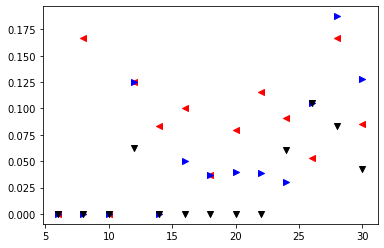

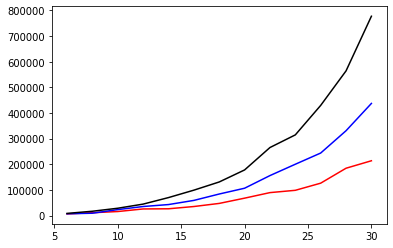

In [66]:
vecinos10 = []
vecinos25 = []
vecinos50 = []
for i in range(df_optimo_tabu.shape[0]):
    if((df_optimo_tabu.iloc[i]["metodo"]=="TS") & (df_optimo_tabu.iloc[i]["longitud_tabu"]==10) & (df_optimo_tabu.iloc[i]["tipo_memoria"]=='soluciones') ):
        if(df_optimo_tabu.iloc[i]["porcentaje_vecindad"]== 10):
            vecinos10.append([df_optimo_tabu.iloc[i]['n'],gap(df_optimo_tabu,i),df_optimo_tabu.iloc[i]['tiempo']])
        if(df_optimo_tabu.iloc[i]["porcentaje_vecindad"]== 25):
            vecinos25.append([df_optimo_tabu.iloc[i]['n'],gap(df_optimo_tabu,i),df_optimo_tabu.iloc[i]['tiempo']])
        if(df_optimo_tabu.iloc[i]["porcentaje_vecindad"]== 50):
            vecinos50.append([df_optimo_tabu.iloc[i]['n'],gap(df_optimo_tabu,i),df_optimo_tabu.iloc[i]['tiempo']])

vecinos10 = sorted(vecinos10, key=lambda x: x[0])
vecinos25 = sorted(vecinos25, key=lambda x: x[0])
vecinos50 = sorted(vecinos50, key=lambda x: x[0])
            
            
plot_vecinos10 = [[],[]] 
plot_vecinos25 = [[],[]] 
plot_vecinos50 = [[],[]] 
plot_vecinos10Time = [[],[]] 
plot_vecinos25Time = [[],[]] 
plot_vecinos50Time = [[],[]]
for resultado in vecinos10:
    plot_vecinos10[0].append(resultado[0])
    plot_vecinos10[1].append(resultado[1])
    plot_vecinos10Time[0].append(resultado[0])
    plot_vecinos10Time[1].append(resultado[2])
for resultado in vecinos25:    
    plot_vecinos25[0].append(resultado[0])
    plot_vecinos25[1].append(resultado[1])
    plot_vecinos25Time[0].append(resultado[0])
    plot_vecinos25Time[1].append(resultado[2])
for resultado in vecinos50:
    plot_vecinos50[0].append(resultado[0])
    plot_vecinos50[1].append(resultado[1])
    plot_vecinos50Time[0].append(resultado[0])
    plot_vecinos50Time[1].append(resultado[2])
plt.scatter(plot_vecinos10[0],plot_vecinos10[1],color = 'red',marker = '<')
plt.scatter(plot_vecinos25[0],plot_vecinos25[1],color = 'blue',marker = '>')
plt.scatter(plot_vecinos50[0],plot_vecinos50[1],color = 'black',marker = 'v')
plt.show()
plt.plot(plot_vecinos10Time[0],plot_vecinos10Time[1],color = 'red')
plt.plot(plot_vecinos25Time[0],plot_vecinos25Time[1],color = 'blue')
plt.plot(plot_vecinos50Time[0],plot_vecinos50Time[1],color = 'black')
plt.show()

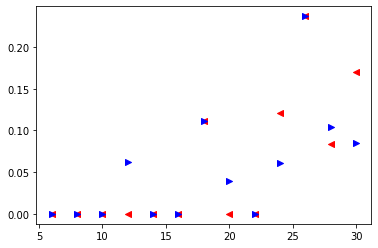

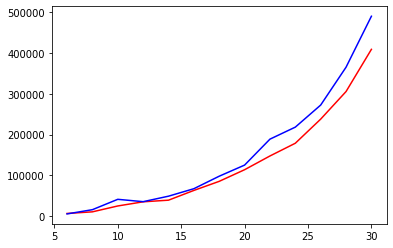

In [63]:
estructural = []
soluciones = []
estructuralTime = []
solucionesTime= []


for i in range(df_optimo_tabu.shape[0]):
    if((df_optimo_tabu.iloc[i]["metodo"]=="TS") & (df_optimo_tabu.iloc[i]["longitud_tabu"]==30) & (df_optimo_tabu.iloc[i]["porcentaje_vecindad"]==25) ):
        if(df_optimo_tabu.iloc[i]["tipo_memoria"]== 'soluciones'):
            soluciones.append([df_optimo_tabu.iloc[i]['n'],gap(df_optimo_tabu,i)])
            solucionesTime.append([df_optimo_tabu.iloc[i]['n'],df_optimo_tabu.iloc[i]['tiempo']])
        if(df_optimo_tabu.iloc[i]["tipo_memoria"]== 'modificaciones'):
            estructural.append([df_optimo_tabu.iloc[i]['n'],gap(df_optimo_tabu,i)])
            estructuralTime.append([df_optimo_tabu.iloc[i]['n'],df_optimo_tabu.iloc[i]['tiempo']])

plot_estructural = [[],[]] 
plot_soluciones = [[],[]] 
plot_estructuraltime = [[],[]] 
plot_solucionestime = [[],[]] 

estructuralTime = sorted(estructuralTime, key=lambda x: x[0])
solucionesTime = sorted(solucionesTime, key=lambda x: x[0])


for i in range(len(estructural)):
    plot_estructural[0].append(estructural[i][0])
    plot_estructural[1].append(estructural[i][1])
    plot_soluciones[0].append(soluciones[i][0])
    plot_soluciones[1].append(soluciones[i][1])
    plot_estructuraltime[0].append(estructuralTime[i][0])
    plot_estructuraltime[1].append(estructuralTime[i][1])
    plot_solucionestime[0].append(solucionesTime[i][0])
    plot_solucionestime[1].append(solucionesTime[i][1])
    
    
plt.scatter(plot_estructural[0],plot_estructural[1],color = 'red',marker = '<')
plt.scatter(plot_soluciones[0],plot_soluciones[1],color = 'blue',marker = '>')
plt.show()
plt.plot(plot_estructuraltime[0],plot_estructuraltime[1],color = 'red')
plt.plot(plot_solucionestime[0],plot_solucionestime[1],color = 'blue')
plt.show()

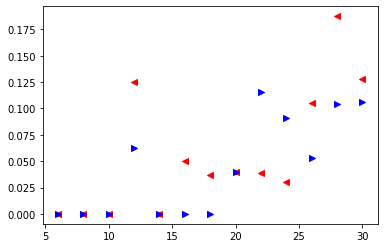

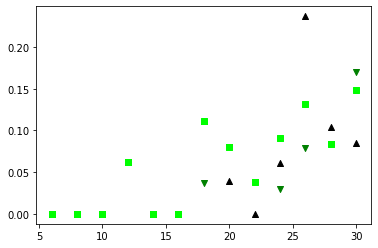

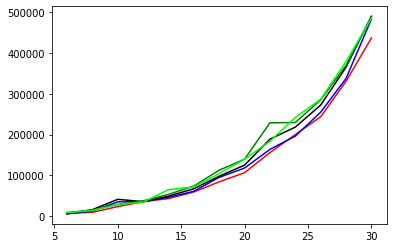

In [89]:
tabu = [10,20,30,40,50]

long_tabu = [[] for i in tabu]
plot_tabu = [[[],[],[]] for i in tabu]


for i in range(df_optimo_tabu.shape[0]):
    if((df_optimo_tabu.iloc[i]["metodo"]=="TS") & (df_optimo_tabu.iloc[i]["tipo_memoria"]=='soluciones') & (df_optimo_tabu.iloc[i]["porcentaje_vecindad"]==25) ):
        long_tabu[tabu.index(df_optimo_tabu.iloc[i]['longitud_tabu'])].append([df_optimo_tabu.iloc[i]['n'],gap(df_optimo_tabu,i),df_optimo_tabu.iloc[i]['tiempo']])

for i in range(len(long_tabu)):
    long_tabu[i] =  sorted(long_tabu[i], key=lambda x: x[0])
    for data in long_tabu[i]:
        plot_tabu[i][0].append(data[0])
        plot_tabu[i][1].append(data[1])
        plot_tabu[i][2].append(data[2])
        

plt.scatter(plot_tabu[0][0],plot_tabu[0][1],color = 'red',marker = '<')
plt.scatter(plot_tabu[1][0],plot_tabu[1][1],color = 'blue',marker = '>')
plt.show()
plt.scatter(plot_tabu[2][0],plot_tabu[2][1],color = 'black',marker = '^')
plt.scatter(plot_tabu[3][0],plot_tabu[3][1],color = 'green',marker = 'v')
plt.scatter(plot_tabu[4][0],plot_tabu[4][1],color = 'lime',marker = 's')
plt.show()

plt.plot(plot_tabu[0][0],plot_tabu[0][2],color = 'red')
plt.plot(plot_tabu[1][0],plot_tabu[1][2],color = 'blue')
plt.plot(plot_tabu[2][0],plot_tabu[2][2],color = 'black')
plt.plot(plot_tabu[3][0],plot_tabu[3][2],color = 'green')
plt.plot(plot_tabu[4][0],plot_tabu[4][2],color = 'lime')
plt.show()